# Mastring Metrics
## Chapter 5
### Differences-in-Differences
Analysis of the effect of monetary policy on bank failures in Mississippi

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The data consists of number of banks in buisness and operation in each day of the years 1929 through 1934 in Mississippi.

In [29]:
banks = pd.read_csv('data/banks.csv')
banks.head()

,date,weekday,day,month,year,bib6,bio6,bib8,bio8
0,10775,Monday,1,7,1929,141,141,169,169
1,10776,Tuesday,2,7,1929,141,141,169,169
2,10777,Wednesday,3,7,1929,141,141,169,169
3,10778,Thursday,4,7,1929,141,141,169,169
4,10779,Friday,5,7,1929,141,141,169,169


In [70]:
Y6_1930 = int(banks[(banks['year'] == 1930) & (banks['month']==7) & (banks['day']==1)]['bib6'].to_string(index=False))
Y6_1930 

135

In [71]:
Y8_1930 = int(banks[(banks['year'] == 1930) & (banks['month']==7) & (banks['day']==1)]['bib8'].to_string(index=False))
Y8_1930 

165

In [72]:
Y6_1931 = int(banks[(banks['year'] == 1931) & (banks['month']==7) & (banks['day']==1)]['bib6'].to_string(index=False))
Y6_1931 

121

In [74]:
Y8_1931 = int(banks[(banks['year'] == 1931) & (banks['month']==7) & (banks['day']==1)]['bib8'].to_string(index=False))
Y8_1931 

132

In [76]:
delta_DD = (Y6_1931-Y6_1930) - (Y8_1931 - Y8_1930)
delta_DD

19

In [77]:
delta_DD2 = (Y6_1931-Y8_1931) - (Y6_1930 - Y8_1930)
delta_DD2

19

Plotting figure 5.1 in the textbook, based on the above values:

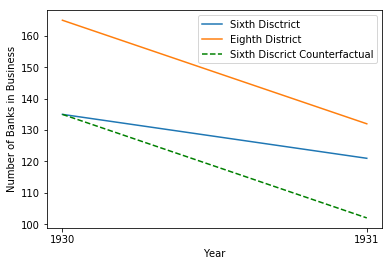

In [97]:
import matplotlib.ticker as mticker

X = [1930, 1931]
Y6 = [Y6_1930, Y6_1931]
Y8 = [Y8_1930, Y8_1931]
CF = [Y6_1930, Y6_1931 - delta_DD]
plt.plot(X, Y6, X, Y8, X, CF, 'g--')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.xlabel("Year")
plt.ylabel("Number of Banks in Business")
plt.legend(('Sixth Disctrict', 'Eighth District', 'Sixth Discrict Counterfactual'))
plt.show()

Extracting the related data for Figure 5.2 in the text book.

In [107]:
Years = list(banks['year'].unique())
Years

[1929, 1930, 1931, 1932, 1933, 1934]

In [119]:
Y6=[]
for year in Years:
    Y6.append(int(banks[(banks['year'] == year) & (banks['month']==7) & (banks['day']==1)]['bib6'].to_string(index=False)))
Y6

[141, 135, 121, 113, 102, 102]

In [120]:
Y8=[]
for year in Years:
    Y8.append(int(banks[(banks['year'] == year) & (banks['month']==7) & (banks['day']==1)]['bib8'].to_string(index=False)))
Y8

[169, 165, 132, 120, 111, 109]

In [121]:
len(Y6)

6

Plotting figure 5.2 in the textbook, based on the above values:

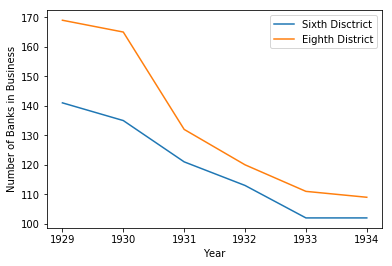

In [122]:
plt.plot(Years, Y6, Years, Y8)
plt.xlabel("Year")
plt.ylabel("Number of Banks in Business")
plt.legend(('Sixth Disctrict', 'Eighth District'))
plt.show()

Calculating the counterfactuals:

In [127]:
CF = []
CF_Year = []
for i in range(len(Years)):
    if Years[i] >= 1930:
        CF_Year.append(Years[i])
        delta = (Y6[i]-Y6_1930)-(Y8[i]-Y8_1930)
        CF.append(Y6[i]-delta)
#     elif Years[i] = 1930:
#         CF_Year.append(Years[i])
#         CF.append(Y6[i])
CF

[135, 102, 90, 81, 79]

Plotting figure 5.3 in the textbook:

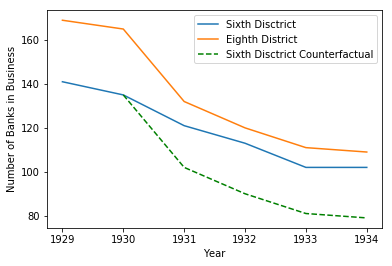

In [130]:
plt.plot(Years, Y6, Years, Y8, CF_Year, CF, 'g--')
# plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.xlabel("Year")
plt.ylabel("Number of Banks in Business")
plt.legend(('Sixth Disctrict', 'Eighth District', 'Sixth Disctrict Counterfactual'))
plt.show()

The dashed line depicts the counterfactual evolution of the number of banks in the sixth district if the same number of banks had failed in that district after 1930 as did in the eighth.

### Just DDo It: A Depression Regression
The simplest DD calculation involves only four numbers (as in ``delta_DD`` or ``delta_DD2``). In practice, however, the DD recipe is best cooked with regression models fit to samples of more than four data points, such as the 12 points plotted in Figure 5.2.
The regression DD recipe associated with Figure 5.2 has three ingredients:
1. A dummy for the treatment district, written $TREAT_d$, where the subscript $d$ reminds us that this varies across districts; $TREAT_d$ controls for fixed differences between the units being compared.
2. A dummy for post-treatment periods, written $POST_t$, where the subscript $t$ reminds us that this varies over time; $POST_t$ controls for the fact that conditions change over time for everyone, whether treated or not.
3. The interaction term, $TREAT_d \times POST_t$, generated by multiplying these two dummies; the coefficient on this term is the DD causal effect.
Regression DD for the Mississippi experiments puts these pieces together by estimating
$$Y_{dt}=\alpha + \beta TREAT_d+\gamma POST_t +\delta_{rDD}(TREAT_d \times POST_t)+e_{dt}$$

In [136]:
newdata = {'Treat_d':[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],\
           'Post_t':[0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1],\
           'TreatPost':[0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],\
           'Ydt': Y6+Y8
        }
df2 = pd.DataFrame(newdata, columns =['Treat_d', 'Post_t', 'TreatPost', 'Ydt'])
df2.index += 1
df2

,Treat_d,Post_t,TreatPost,Ydt
1,1,0,0,141
2,1,0,0,135
3,1,1,1,121
4,1,1,1,113
5,1,1,1,102
6,1,1,1,102
7,0,0,0,169
8,0,0,0,165
9,0,1,0,132
10,0,1,0,120


In [137]:
import statsmodels.api as sm # import statsmodels
X = df2[['Treat_d', 'Post_t', 'TreatPost']] ## X usually means our input variables (or independent variables)
y = df2['Ydt'] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (alpha) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Ydt   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     21.71
Date:                Wed, 10 Jun 2020   Prob (F-statistic):           0.000337
Time:                        21:59:43   Log-Likelihood:                -40.628
No. Observations:                  12   AIC:                             89.26
Df Residuals:                       8   BIC:                             91.20
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        167.0000      6.190     26.980      0.000     152.727     181.273
Treat_d      -29.0000      8.754     -3.313      0.011     -49.186      -8.814
Post_t       -49.0000      7.581     -6.464      0.000     -66.481     -31.519
TreatPost     20.5000     10.721      1.912      0.092      -4.222      45.222
==============================================================================
Omnibus:                        1.065   Durbin-Watson:                   1.668
Prob(Omnibus):                  0.587   Jarque-Bera (JB):                0.856
Skew:                           0.548   Prob(JB):                        0.652
Kurtosis:                       2.285   Cond. No.                         8.44
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As you can see the coefficients for each model's parameter are:
$$\alpha = 167$$
$$\beta = -29$$
$$\gamma = -49$$
$$\delta_{rDD} = 20.5 $$


$$Y_{dt}=167 - 29 TREAT_d - 49 POST_t + 20.5(TREAT_d \times POST_t)+e_{dt}$$

### Refrences
- Angrist, J. D., & Pischke, J. S. (2014). Mastering'metrics: The path from cause to effect. Princeton University Press.
- http://www.masteringmetrics.com/